In [1]:
'''
Author: James Parkington
Date:   2023-04-03

This script uses the OrderHistory and CustomerInfo classes to generate random datasets as dataframes, SQL tables, and CSV files.
This first cell starts the SQLite3 instance and describes the dataset. The execution for a 500K dataset should not 
take more than a minute.

1. Find a list of unique customers that do not have an order in September 2022.
2. Find a list of unique customers whose first order is greater than $100?
3. Write a query that returns each store's daily sales as well as the monthly sales to date (e.g. if the date is 10/15/2022 
   the monthly sales to date should be the sum of daily sales from Oct 1st - Oct 15th) for all months and dates 
   in the dataset. 
   
   The final table should have columns: date, store_id, daily sales, and monthly sales to date.
'''

import numpy     as np
from datetime import date

from Classes.OrderHistory import OrderHistory
from Classes.CustomerInfo import CustomerInfo
from Classes.Utilities    import *

load_sql() # Connects to `jane.db`, so subsequent cells can be run directly off of that SQLite database

# This variable allows the same customer_ids to be repurposed for the CustomerInfo class
order_history_class = OrderHistory(7000000,
                                   75,
                                   date(2022, 1, 1),
                                   date(2022, 12, 31))

order_history = order_history_class()
customer_info = CustomerInfo(order_history_class)()

In [2]:
%%sql
-- 1. Find a list of unique customers that do not have an order in September 2022 using LEFT JOIN and strftime.

/*
DESCRIPTION
  This query retrieves a list of unique customers who did not place an order in September 2022 using LEFT JOIN and STRFTIME.

KEY DECISIONS
  1. A LEFT JOIN is used to connect the CustomerInfo and OrderHistory tables, allowing us to identify customers 
     who have no order records in the specified time period.
  2. The ON clause filters for orders placed in September 2022 using the STRFTIME function to extract the year and month 
     from the `order_date`.
  3. SELECT DISTINCT is used to retrieve unique customer records.
  4. Unfortunately, SQLite3 doesn't support LEFT ANTI JOIN.
     We could use this to avoid needing the final WHERE clause, slightly simplifying the query.
  5. A LIMIT has been added to minimize the space this notebook cell takes up. It's not necessary for the analysis.
*/

    SELECT DISTINCT
           ci.*
           
      FROM customer_info ci
 LEFT JOIN order_history oh ON ci.customer_id = oh.customer_id
                           AND STRFTIME('%Y-%m', oh.order_date) = '2022-09'

     WHERE oh.order_id IS NULL

     LIMIT 25

 * sqlite:///../Data/jane.db
Done.


customer_id,customer_name,phone,address,city,state,postal_code,sales_rep_employee_id,credit_limit
1000001,Kent Lee,+1-393-824-1814x932,64389 Michael Keys Apt. 803,Bayonne,NJ,07002,SRE5,4900.0
1000129,Cindy Williams,(885)917-4984,466 Rachel Camp,New York,NY,10003,SRE2,2700.0
1000414,Roger Martinez,(420)294-5188,63197 Mann Rapid Suite 194,Avondale Estates,GA,30002,SRE3,1800.0
1001205,Bryan Gutierrez,045.326.0997,6287 Jennifer Mountain Suite 853,Beaver,PA,15009,SRE5,3000.0
1001334,Gregory Martin,001-093-893-6443x8304,424 Grimes Burg,Auburn,WA,98001,SRE2,4600.0
1001398,Ralph Gilbert,(733)142-7254x014,327 Dawn Mountain,Los Angeles,CA,90001,SRE2,3100.0
1002577,Paul Rose,836-380-4521,94037 Taylor Ranch Suite 892,Marks,MS,38609,SRE4,3900.0
1003061,Brian Burns,001-218-747-6868x41166,02974 Danielle Pines,Bryceville,FL,32009,SRE3,2800.0
1003066,Angela Ramirez,427.596.9854x92690,71303 Kennedy Court,Fairfield,NJ,07004,SRE7,4600.0
1003546,David Webb,(134)365-3915,398 Joan Burg Apt. 230,Alexandria,TN,37012,SRE8,4200.0


In [3]:
# Takes the SQL output from the previous cell and immediately converts it to a pandas DataFrame
question_1 = _.DataFrame()

In [4]:


%%sql
-- 2. Find a list of unique customers whose first order is greater than $100.

/*
DESCRIPTION
  This query retrieves a list of unique customers whose first order is greater than 100.

KEY DECISIONS
  1. A CTE is used to identify the first order and convert it to a boolean for each customer using ROW_NUMBER() with a window function.
  2. The main query filters the results based on the `order_amount` greater than 100.
  3. SELECT DISTINCT is used to retrieve unique customer records.
  4. Unfortunately, SQLite3 doesn't support QUALIFY. We would've used it to immediately filter the CTE's WINDOW 
     for the 2 conditions in the main WHERE clause, simplifying the main query.
  5. A LIMIT has been added to minimize the space this notebook cell takes up. It's not necessary for the analysis.

NOTE
  In this exercise, each question is answered in isolation. 
  In a production context, we would typically use CTEs or upstream view creation for the common transformations 
  across each business question using these schema.
*/

   WITH first_orders AS 
(SELECT customer_id,
        order_amount,
        ROW_NUMBER() OVER (PARTITION BY customer_id 
                               ORDER BY order_date) = 1 AS first_order

   FROM order_history)
------- 
-------       
 SELECT *

   FROM customer_info
   JOIN first_orders USING (customer_id)

  WHERE first_order
    AND order_amount > 100
  ORDER BY 1

  LIMIT 25

 * sqlite:///../Data/jane.db
Done.


customer_id,customer_name,phone,address,city,state,postal_code,sales_rep_employee_id,credit_limit,order_amount,first_order
1001334,Gregory Martin,001-093-893-6443x8304,424 Grimes Burg,Auburn,WA,98001,SRE2,4600.0,100.46,1
1007104,Sarah Gregory,9310169362,1141 Erin Field Apt. 060,Adams,TN,37010,SRE3,5700.0,165.86,1
1020701,Darrell Wilson,+1-031-344-2513x6359,7829 Aguilar Ranch,Kittery Point,ME,03905,SRE8,2300.0,155.07,1
1020780,Larry Myers,(283)007-9119x570,0021 Hernandez Square,Cheyenne,WY,82009,SRE6,1300.0,111.53,1
1023606,Sierra Evans,+1-878-802-3123x50258,44826 Jimenez Mills,Phoenix,AZ,85006,SRE5,3700.0,100.42,1
1024353,Derek Alvarado,+1-714-204-9271x54130,30743 Jason Viaduct,Belchertown,MA,01007,SRE8,2300.0,117.51,1
1028835,Crystal Howard,001-000-441-4135x449,68958 Anna Dale,Pine Bluff,AR,71603,SRE10,5000.0,251.87,1
1035343,Joel Cummings,225.407.3426,38586 Isaac Mall,Boulder City,NV,89005,SRE9,4100.0,258.39,1
1038630,Jason Bryant,400-728-0943,87137 Brown Branch Suite 224,Absarokee,MT,59001,SRE9,2200.0,156.73,1
1039552,Steven Ortega,685.266.6206x9303,228 Benjamin Prairie Suite 786,Arthur,ND,58006,SRE8,5500.0,106.09,1


In [5]:
# Takes the SQL output from the previous cell and immediately converts it to a pandas DataFrame
question_2 = _.DataFrame()

In [6]:
%%sql
-- 3. Write a query that returns each store's daily sales as well as the monthly sales to date.

/*
DESCRIPTION
  This query calculates each store's daily sales and the monthly sales to date for all months and dates in the dataset. 

KEY DECISIONS
  1. The main query calculates the daily sales for each store by aggregating the `order_amount` for each `store_id` and `order_date`.
  2. A correlated subquery is used to calculate the monthly sales to date for each store. 
     It's a better choice over a CTE in this specific case, as it allows us to compute the running total for each row 
     in the main query without needing a resource-intense JOIN.
  3. The correlated subquery filters the `order_history` table based on the same `store_id`, 
     and the same month as the main query. It also ensures that the `order_date` is less than or equal to today's day of the month.
  4. A LIMIT has been added to minimize the space this notebook cell takes up. It's not necessary for the analysis.

NOTE
  In this exercise, each question is answered in isolation. 
  In a production context, we would typically use CTEs or upstream view creation for the common transformations 
  across each business question using these schema.
*/

SELECT store_id,
       order_date,
       ROUND(SUM(oh.order_amount), 2) AS daily_sales,

      -- Beginning of the correlated subquery
       (SELECT ROUND(SUM(ms.order_amount), 2)
          FROM order_history ms
         WHERE ms.store_id = oh.store_id
           AND strftime('%Y-%m', ms.order_date)  = strftime('%Y-%m', oh.order_date)
           AND strftime('%d',    ms.order_date) <= strftime('%d',    DATE('now'))) AS monthly_sales_to_date

  FROM order_history oh

 GROUP BY 1, 2
 ORDER BY CAST(SUBSTR(store_id, 2) AS INT), 2

 LIMIT 25 -- Remove this to see the full dataset

 * sqlite:///../Data/jane.db
Done.


store_id,order_date,daily_sales,monthly_sales_to_date
S1,2022-01-02,106.8,738.89
S1,2022-01-03,86.04,738.89
S1,2022-01-04,93.67,738.89
S1,2022-01-07,149.65,738.89
S1,2022-01-10,70.42,738.89
S1,2022-01-14,156.1,738.89
S1,2022-01-16,76.21,738.89
S1,2022-01-20,91.19,738.89
S1,2022-01-23,84.14,738.89
S1,2022-01-24,60.58,738.89


In [7]:
# Takes the SQL output from the previous cell and immediately converts it to a pandas DataFrame
question_3 = _.DataFrame()

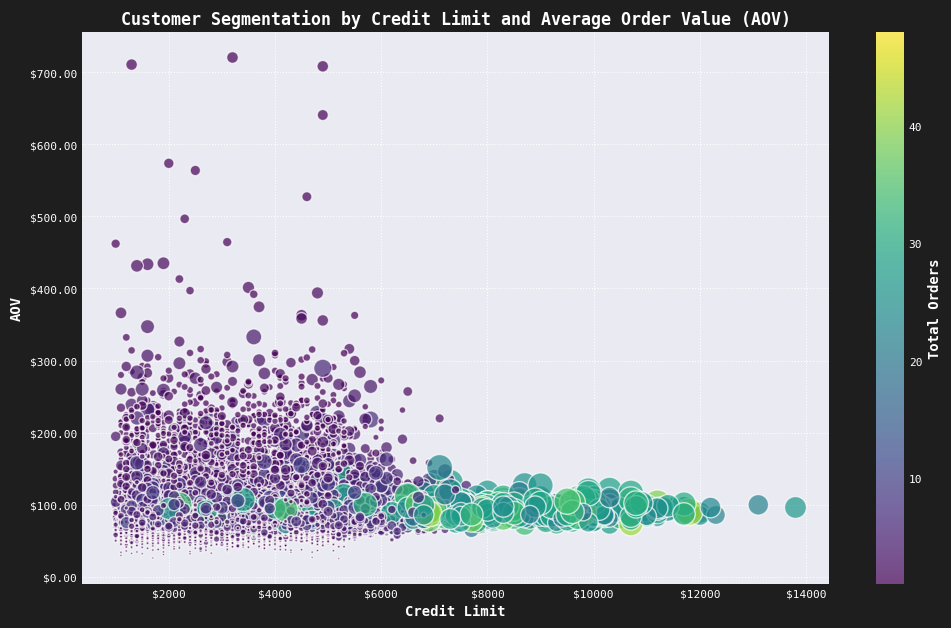

In [8]:
'''
Customer Segmentation by Credit Limit and Average Order Value
Visualizes the distribution of customers based on their credit limit and average order value using a scatter plot,
with marker size representing total spending and categorized by the total number of orders per customer.

A scatter plot is an appropriate choice for visualizing customer segmentation based on credit limit and average
order value as it effectively displays individual data points across two axes, revealing potential customer
segments, trends, or outliers.

This analysis can help businesses identify customer segments that may have a higher propensity to spend,
enabling targeted marketing efforts and potentially increasing sales.

This analysis uses a `load_plot` utility function to apply a custom dark style and common customizations
to the pyplot output.
'''

# Load the custom plot settings
plot, axes, _ = load_plot()

# Prepare the data
customer_data = customer_info.merge(order_history, on = 'customer_id') \
                             .groupby(['customer_id', 'credit_limit']) \
                             .agg(sum   = ('order_amount', 'sum'),
                                  count = ('order_amount', 'count'),
                                  aov   = ('order_amount', lambda x: x.sum() / x.count())) \
                             .reset_index()

# Create the scatter plot
scatter_plot = plot.scatter(customer_data['credit_limit'],
                            customer_data['aov'],
                            c          = customer_data['count'],
                            cmap       = 'viridis',
                            alpha      = 0.7,
                            edgecolors = "white",
                            s          = customer_data['sum'] / 10)

# Format the x-axis (Credit Limit) and y-axis (AOV) as dollar amounts
axes.xaxis.set_major_formatter(lambda x, pos: f'${x:.0f}')
axes.yaxis.set_major_formatter(lambda x, pos: f'${x:.2f}')

# Set the labels and titles
plot.xlabel('Credit Limit')
plot.ylabel('AOV')
plot.title('Customer Segmentation by Credit Limit and Average Order Value (AOV)')

# Add a color bar for total orders
plot.colorbar(scatter_plot).set_label('Total Orders')

plot.show()

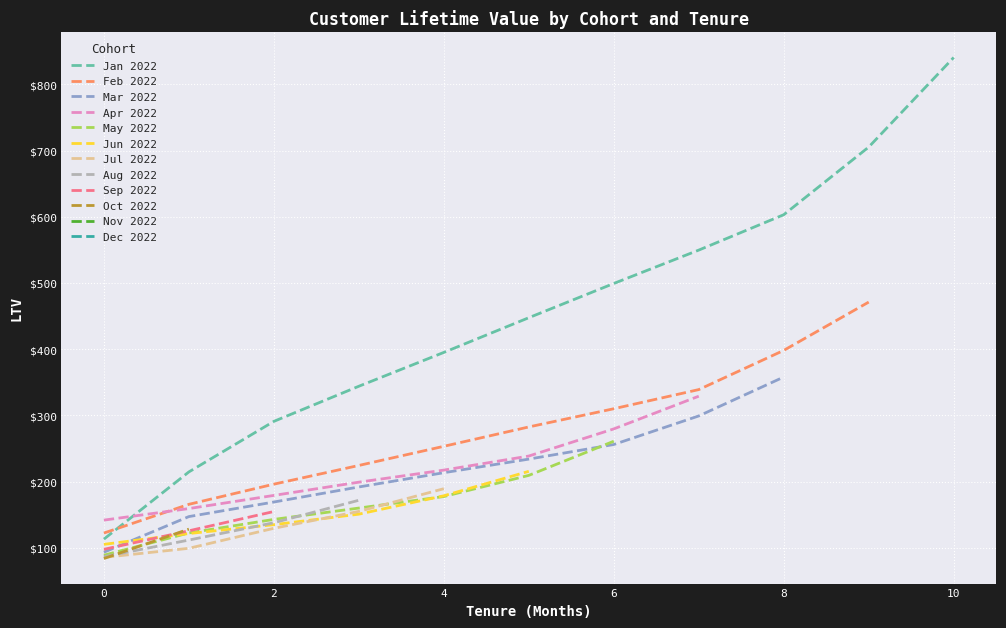

In [9]:
'''
Customer Lifetime Value by Cohort and Tenure
Visualizes the average Customer Lifetime Value (LTV) by cohort and tenure using a line chart.

A line chart is an appropriate choice for visualizing the average LTV by cohort and tenure, as it effectively displays
trends and patterns in customer behavior across different cohorts and tenure, revealing potential differences in
customer value and spending habits over time.

This analysis can help businesses understand how customer value evolves over time for different cohorts as their tenure
increases, enabling targeted marketing efforts, resource allocation, and potentially improving customer retention.

This analysis uses a `load_plot` utility function to apply a custom dark style and common customizations
to the pyplot output.
'''

# Load the custom plot settings
plot, axes, colors = load_plot()

# Calculate order_month from `order_date`, `cohort`, and `c_order_amount`
order_history['order_month'] = pd.to_datetime(order_history['order_date']).dt.to_period('M').dt.to_timestamp()
order_history['cohort']      = order_history.groupby('customer_id')['order_month'].transform('min')
order_history['tenure']      = ((order_history['order_month'] - order_history['cohort']) / np.timedelta64(1, 'M')).astype(int)

# Group by `cohort` and `tenure`, then calculate the sum of `order_amount`
ltv_data = order_history.groupby(['cohort', 'tenure'])['order_amount'].agg('sum').reset_index() \
                        .merge(order_history.groupby('cohort')['customer_id'].nunique().reset_index(), 
                               on  = 'cohort', 
                               how = 'left')

# Calculate the average revenue per customer for each cohort and tenure combination, and calculate the cumulative sum
ltv_data['mean_amount'] = ltv_data['order_amount'] / ltv_data['customer_id']
ltv_data['ltv']         = ltv_data.groupby('cohort')['mean_amount'].cumsum()

# Create the LTV by cohort line chart
for i, (cohort, group_data) in enumerate(ltv_data.groupby('cohort')):
    plot.plot(group_data['tenure'], 
              group_data['ltv'], 
              linestyle = '--', 
              linewidth = 2,
              label     = cohort.strftime('%b %Y'), 
              color     = colors[i])

# Format the y-axis (LTV) as dollar amounts
axes.yaxis.set_major_formatter(lambda x, _: f'${x:.0f}')

# Set the labels and titles
plot.xlabel('Tenure (Months)')
plot.ylabel('LTV')
plot.title('Customer Lifetime Value by Cohort and Tenure')

# Customize the legend
legend = plot.legend(title = 'Cohort', loc = 'upper left')
legend.get_title().set_fontsize(9)

plot.show()

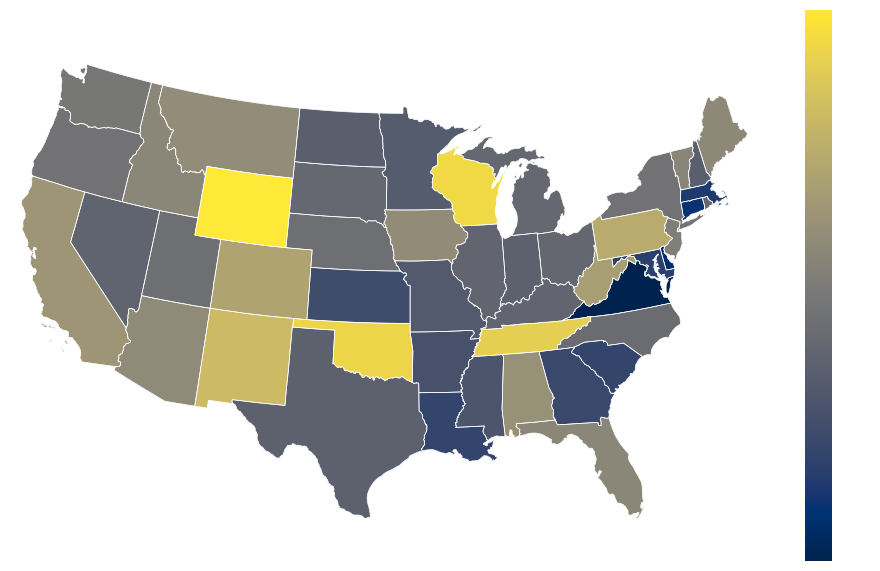

In [10]:
'''
Average Order Value by State
Visualizes the average order value (AOV) by state using a color-coded map of the United States.

This analysis can help businesses identify regions with higher average order values, enabling targeted marketing efforts
and potentially increasing sales. The map can be useful for visualizing regional differences in purchasing behavior.

The analysis employs the Basemap library to create a Lambert Conformal map of the United States, which offers a visually
appealing representation of the country while preserving shape and area. This map projection is particularly suitable for
regional visualizations in the contiguous United States.

By using a colormap and normalization, the AOV data is translated into a range of colors, which are applied to each state
based on their respective AOVs. This approach enables easy visual identification of regions with higher or lower AOVs.

A colorbar is added to the plot, providing a reference for the AOV values associated with each color. This enhances the
interpretability of the map by making it easier for the viewer to understand the AOV distribution across states.

This analysis uses a `load_plot` utility function to apply a custom dark style and common customizations
to the pyplot output, ensuring a consistent visual appearance across all plots.
'''

from mpl_toolkits.basemap   import Basemap
from matplotlib.colors      import Normalize
from matplotlib.patches     import Polygon
from matplotlib.collections import PatchCollection

# Load the custom plot settings
plot, axes, _ = load_plot()
plot.gca().set_facecolor('none')
plot.gcf().set_facecolor('none')

# Prepare the data
state_aov = customer_info.merge(order_history, on = 'customer_id') \
                         .groupby(customer_info['state'].apply(get_state_name))['order_amount'] \
                         .mean() \
                         .reset_index()

# Lambert Conformal map of lower 48 states.
map = Basemap(llcrnrlon  = -119,  llcrnrlat = 23, urcrnrlon = -64, urcrnrlat = 49, 
              projection = 'lcc', lat_1     = 33, lat_2     = 45,  lon_0 = -95, 
              ax         = axes)

map.readshapefile('../Resources/Shapes/us_states', 'states', color = '1')

# Set colormap and normalization for the average order value
cmap = plot.cm.cividis
norm = Normalize(vmin = np.min(state_aov['order_amount']), 
                 vmax = np.max(state_aov['order_amount']))

# Create a list of Polygon objects for each of the states
polygons = []
for state_name, outline in zip((state['NAME'] for state in map.states_info), map.states):
    aov = next((x for x in state_aov.loc[state_aov['state'] == state_name, 'order_amount'].values), 0)
    polygons.append(Polygon(outline, facecolor = cmap(norm(aov))[:3]))


# Add the polygons to the plot and create a PatchCollection
patch_collection = PatchCollection(polygons, match_original = True, cmap = cmap, norm = norm)
axes.add_collection(patch_collection)
axes.set_title('Average Order Value by State')

# Add colorbar
cb = plot.colorbar(mappable = patch_collection, ax = axes).set_label('AOV ($)')

plot.show()

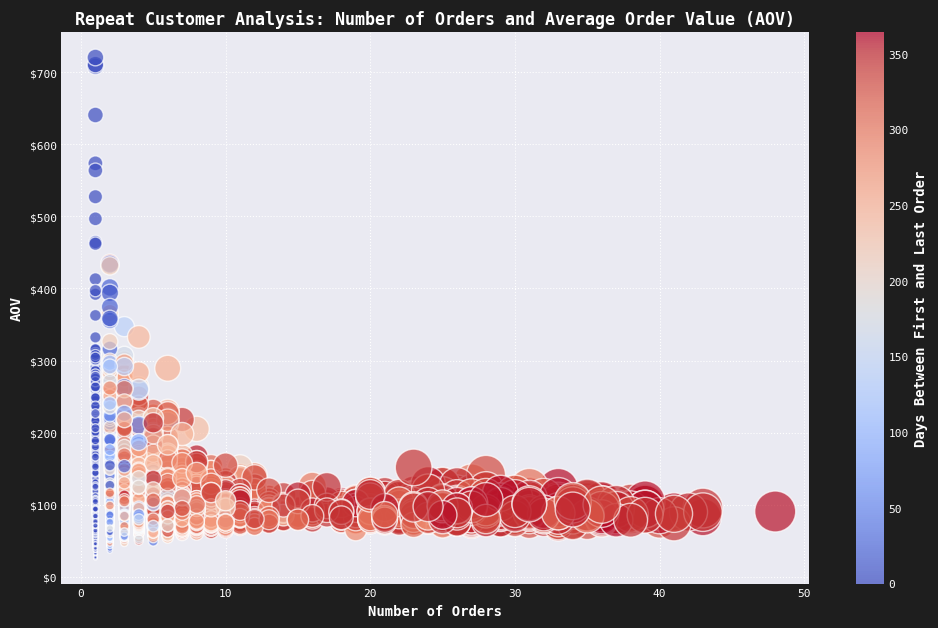

In [11]:
'''
Repeat Customer Analysis: Visualizing Repeat Customers Based on Number of Orders and Average Order Value
Visualizes the distribution of repeat customers based on the number of orders and average order value using a scatter plot,
with marker size representing total spending and categorized by the time between their first and last order.

A scatter plot is an appropriate choice for visualizing customer segmentation based on the number of orders and average
order value as it effectively displays individual data points across two axes, revealing potential customer
segments, trends, or outliers.

This analysis can help businesses identify customer segments with a higher propensity for repeat purchases,
enabling targeted retention and loyalty strategies.

This analysis uses a `load_plot` utility function to apply a custom dark style and common customizations
to the pyplot output.
'''

# Load the custom plot settings
plot, axes, _ = load_plot()

# Prepare the data
customer_data = customer_info.merge(order_history, on = 'customer_id') \
                             .groupby('customer_id') \
                             .agg(sum          = ('order_amount', 'sum'),
                                  count        = ('order_amount', 'count'),
                                  aov          = ('order_amount', lambda x: x.sum() / x.count()),
                                  days_between = ('order_date', lambda x: (pd.to_datetime(x).max() - pd.to_datetime(x).min()).days)) \
                             .reset_index()

# Create the scatter plot
scatter_plot = plot.scatter(customer_data['count'],
                            customer_data['aov'],
                            c          = customer_data['days_between'],
                            cmap       = 'coolwarm',
                            alpha      = 0.7,
                            edgecolors = "white",
                            s          = customer_data['sum'] / 5)

# Format the y-axis (AOV) label
axes.yaxis.set_major_formatter(lambda x, pos: f'${x:.0f}')

# Set the labels and titles
plot.xlabel('Number of Orders')
plot.ylabel('AOV')
plot.title('Repeat Customer Analysis: Number of Orders and Average Order Value (AOV)')

# Add a color bar for days between first and last order
plot.colorbar(scatter_plot).set_label('Days Between First and Last Order')

plot.show()

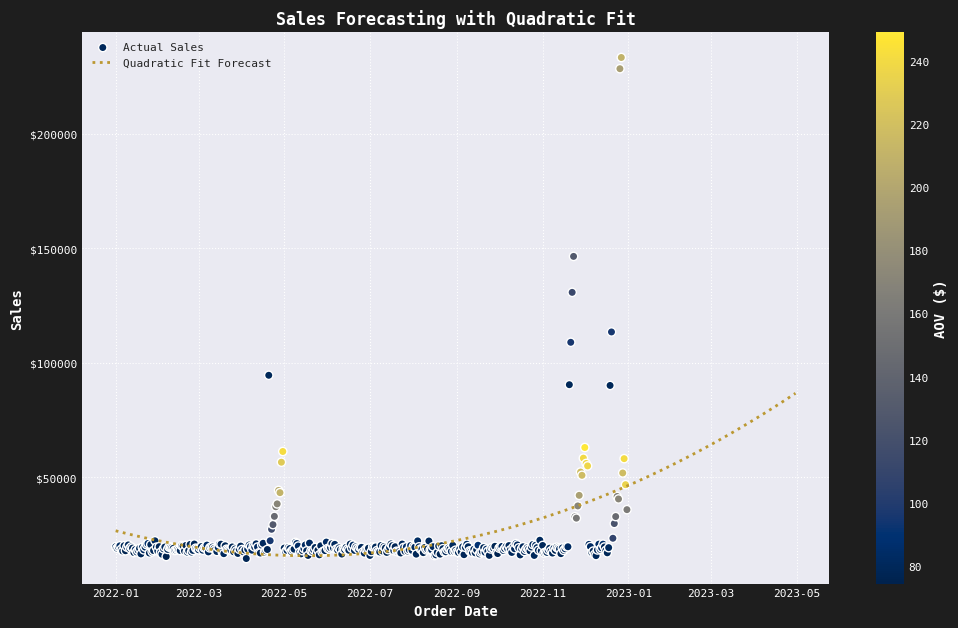

In [12]:
"""
This script creates a sales forecasting plot using a quadratic fit based on historical order data. The quadratic
function is a second-degree polynomial (ax^2 + bx + c) that is fitted to the sales data using SciPy's curve_fit
function. Quadratic fitting can provide a good approximation of trends in the data and help in predicting future
sales. The results can be useful for businesses to make data-driven decisions, allocate resources efficiently, and
plan for future growth.

The analysis takes into account the following metrics:
1. Total daily sales
2. Average Order Value (AOV) - used as a colormap to visualize the distribution of order values in the data

The x-axis represents the order_date, including the forecasted period, and the y-axis represents the sales amount.
The actual sales data is visualized using a scatter plot, while the forecasted sales are represented by a line.
"""

from scipy.optimize import curve_fit

# Load and prepare the data
daily_sales = order_history.groupby('order_date') \
                           .agg(sum   = ('order_amount', 'sum'),
                                count = ('order_amount', 'count'),
                                aov   = ('order_amount', lambda x: x.sum() / x.count())) \
                           .reset_index()

# Define a quadratic function
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Prepare the data
depths   = np.array(range(1, len(daily_sales) + 1))
g_values = np.array(daily_sales['sum'])

# Fit the quadratic curve
depth_range = np.linspace(1, len(daily_sales) + 120, 485)
predictions = quadratic(depth_range, *curve_fit(quadratic, depths, g_values)[0])

# Load the custom plot settings
plot, axes, colors = load_plot()

# Create the scatter plot for actual sales data
scatter_plot = plot.scatter(daily_sales['order_date'],
               g_values,
               c          = daily_sales['aov'],
               cmap       = 'cividis',
               marker     = 'o',
               edgecolors = 'white',
               label      = "Actual Sales")

# Create the fit line for sales forecast
forecast_dates = pd.date_range(start   = daily_sales['order_date'].min(), 
                               periods = len(depth_range))
plot.plot(forecast_dates,
          predictions,
          color     = colors[9],
          linestyle = ':',
          linewidth = 2,
          label     = "Quadratic Fit Forecast")

# Format the y-axis (Sales) label
axes.yaxis.set_major_formatter(lambda x, pos: f'${x:.0f}')

# Set labels and titles
plot.xlabel("Order Date")
plot.ylabel("Sales")
plot.title("Sales Forecasting with Quadratic Fit")

plot.colorbar(scatter_plot).set_label('AOV ($)')
plot.legend(loc = 'upper left')
plot.show()